In [ ]:
!curl -o pima-indians-diabetes.csv https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23278  100 23278    0     0   158k      0 --:--:-- --:--:-- --:--:--  158k


In [ ]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [ ]:
print(pima)

     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]


In [ ]:
#Selecting Feature
#Here, you need to divide the given columns into two types of variables dependent(or target variable) and 
#independent variable(or feature variables).

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

#split dataset in features and target variable
X = pima[feature_cols]               # Features
y = pima.label                       # Target variable

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
print(X.shape)
print(X_train.shape)
print(y_train.shape)
print()
print(y.shape)
print(X_test.shape)
print(y_test.shape)


(768, 7)
(614, 7)
(614,)

(768,)
(154, 7)
(154,)


In [ ]:
#Model Development and Prediction

                                                                  # import the class
from sklearn.linear_model import LogisticRegression

                                                                        # instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

                                                                  # fit the model with data
history=logreg.fit(X_train,y_train)

                                                                       #
y_pred=logreg.predict(X_test)

NameError: ignored

In [ ]:
#Model Evaluation using Confusion Matrix
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[98,  9],
       [18, 29]])

In [ ]:
#Confusion Matrix Evaluation Metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


[Text(0, 0.5, 'Diabetes(0/1)'), Text(0.5, 0, 'Age')]

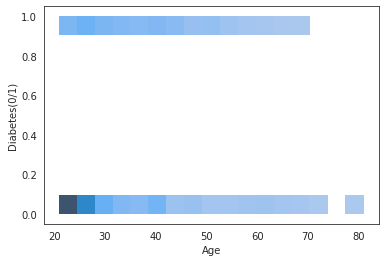

In [ ]:
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
histo = sns.histplot(x ="age", y ="label", data = pima);
histo.set(ylabel = 'Diabetes(0/1)', xlabel = 'Age')

[Text(0, 0.5, 'Diabetes(0/1)'), Text(0.5, 0, 'bmi')]

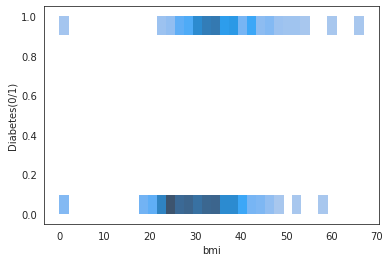

In [ ]:
histo = sns.histplot(x ="bmi", y ="label", data = pima);
histo.set(ylabel = 'Diabetes(0/1)', xlabel = 'bmi')

[Text(0, 0.5, 'Diabetes(0/1)'), Text(0.5, 0, 'bp')]

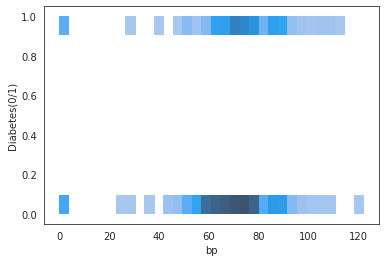

In [ ]:
histo = sns.histplot(x ="bp", y ="label", data = pima);
histo.set(ylabel = 'Diabetes(0/1)', xlabel = 'bp')

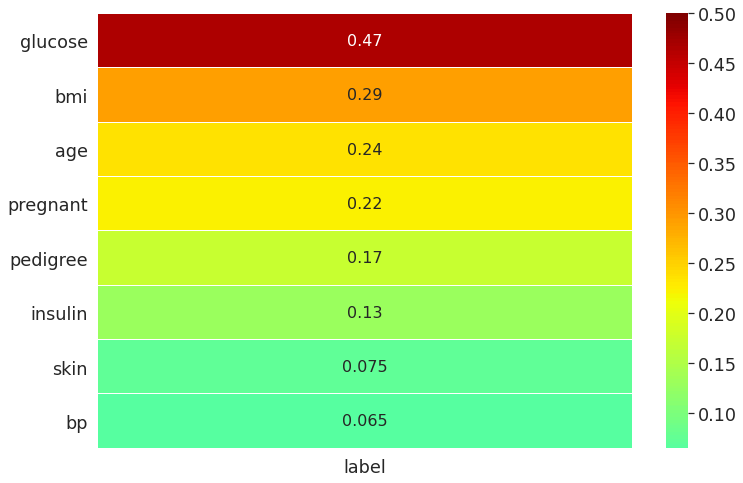

In [ ]:
cor = pima.corr().iloc[ : , -1].sort_values(ascending=False)[1:].to_frame()
sns.set(font_scale=1.6)
plt.figure(figsize=(12, 8))
sns.heatmap(data= cor, cmap="jet",center=0.1, annot=True, vmax=.5, linewidths=0.1,annot_kws={"size": 16})
plt.show()

In [ ]:
# Import Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

# Create linear regression objest

lin_reg=linear_model.LinearRegression()

# Train the model using training and test data

lin_reg.fit(X_train,y_train)

# Presict values for X_test data

predicted = lin_reg.predict(X_test)



 Coefficients are:
 [ -30.62168241 -272.25451707  528.84444333  327.70269026 -581.01413007
  332.96286278  -27.97606192  139.28448979  665.07521004   61.90596378]

Intercept :  151.43006895898006
Variance score:  0.43843604017332694
Mean squared error: 2992.56



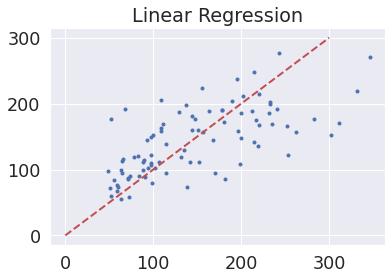

In [ ]:
# Regression coefficients [https://statisticsbyjim.com/glossary/regression-coefficient/]

print('\n Coefficients are:\n',lin_reg.coef_)

# Intercept

print('\nIntercept : ',lin_reg.intercept_)

# variance score: 1 means perfect prediction

print('Variance score: ',lin_reg.score(X_test, y_test))

# Mean Squared Error

print("Mean squared error: %.2f\n"
      % mean_squared_error(y_test, predicted))

# Original data of X_test

expected = y_test

# Plot a graph for expected and predicted values

plt.title('Linear Regression')
plt.scatter(expected,predicted,c='b',marker='.',s=36)
plt.plot(np.linspace(0, 300, 100),np.linspace(0, 300, 100), '--r', linewidth=2)

plt.show()

The mean squared error (MSE) on test set: 0.2098


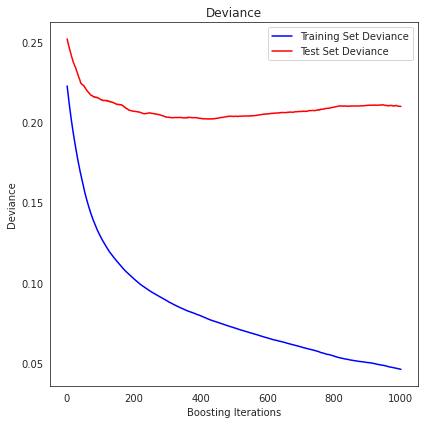

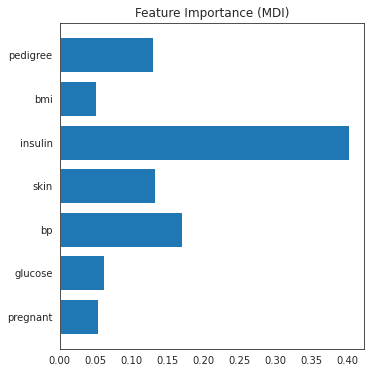

In [ ]:
"""
============================
Gradient Boosting regression
============================

This example demonstrates Gradient Boosting to produce a predictive
model from an ensemble of weak predictive models. Gradient boosting can be used
for regression and classification problems. Here, we will train a model to
tackle a diabetes regression task. We will obtain the results from
:class:`~sklearn.ensemble.GradientBoostingRegressor` with least squares loss
and 500 regression trees of depth 4.

"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# %%
# Load the data
# -------------------------------------
#
# First we need to load the data.


# %%
# Data preprocessing
# -------------------------------------
#
# Next, we will split our dataset to use 90% for training and leave the rest
# for testing. We will also set the regression model parameters. You can play
# with these parameters to see how the results change.
#
# n_estimators : the number of boosting stages that will be performed.
# Later, we will plot deviance against boosting iterations.
#
# max_depth : limits the number of nodes in the tree.
# The best value depends on the interaction of the input variables.
#
# min_samples_split : the minimum number of samples required to split an
# internal node.
#
# learning_rate : how much the contribution of each tree will shrink.
#
# loss : loss function to optimize. The least squares function is  used in this
# case however, there are many other options (see
# :class:`~sklearn.ensemble.GradientBoostingRegressor` ).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

# %%
# Fit regression model
# -------------------------------------
#
# Now we will initiate the gradient boosting regressors and fit it with our
# training data. Let's also look and the mean squared error on the test data.

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

# %%
# Plot training deviance
# -------------------------------------
#
# Finally, we will visualize the results. To do that we will first compute the
# test set deviance and then plot it against boosting iterations.

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# %%
# Plot feature importance
# -------------------------------------
#
# Careful, impurity-based feature importances can be misleading for
# high cardinality features (many unique values). As an alternative,
# the permutation importances of ``reg`` can be computed on a
# held out test set. See :ref:`permutation_importance` for more details.
#
# For this example, the impurity-based and permutation methods identify the
# same 2 strongly predictive features but not in the same order. The third most
# predictive feature, "bp", is also the same for the 2 methods. The remaining
# features are less predictive and the error bars of the permutation plot
# show that they overlap with 0.

feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[:10], align='center')
plt.yticks(pos, np.array(pima.columns)[:-1])
plt.title('Feature Importance (MDI)')
plt.show()